In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_order, coint_johansen
from sklearn.preprocessing import StandardScaler
import networkx as nx

# Equations

\[
\begin{align*}
\text{Awareness}_t &= \alpha_1 + \beta_{11} \text{Awareness}_{t-1} + \beta_{12} \text{Consideration}_{t-1} + \beta_{13} \text{Base}_{t-1} + \varepsilon_{1t} \\
\text{Consideration}_t &= \alpha_2 + \beta_{21} \text{Awareness}_{t-1} + \beta_{22} \text{Consideration}_{t-1} + \beta_{23} \text{Base}_{t-1} + \varepsilon_{2t} \\
\text{Base}_t &= \alpha_3 + \beta_{31} \text{Awareness}_{t-1} + \beta_{32} \text{Consideration}_{t-1} + \beta_{33} \text{Base}_{t-1} + \varepsilon_{3t}
\end{align*}
\]

\[
\begin{align*}
\text{Awareness}_t &= \alpha_1 + \beta_{11} \text{Awareness}_{t-1} + \beta_{12} \text{Consideration}_{t-1} + \beta_{13} \text{Base}_{t-1} + \gamma_1 \text{Marketing}_t + \delta_1 \text{Demand}_t + \varepsilon_{1t} \\
\text{Consideration}_t &= \alpha_2 + \beta_{21} \text{Awareness}_{t-1} + \beta_{22} \text{Consideration}_{t-1} + \beta_{23} \text{Base}_{t-1} + \gamma_2 \text{Marketing}_t + \delta_2 \text{Demand}_t + \varepsilon_{2t} \\
\text{Base}_t &= \alpha_3 + \beta_{31} \text{Awareness}_{t-1} + \beta_{32} \text{Consideration}_{t-1} + \beta_{33} \text{Base}_{t-1} + \gamma_3 \text{Marketing}_t + \delta_3 \text{Demand}_t + \varepsilon_{3t}
\end{align*}
\

$$ 
\Delta Y_t = \alpha + \Gamma_1 \Delta Y_{t-1} + \Gamma_2 \Delta X_{t} + \Pi Y_{t-1} + \varepsilon_t
$$

\[
\begin{aligned}
\Delta \text{Awareness}_t &= \alpha_1 + \beta_{11} \Delta \text{Awareness}_{t-1} + \beta_{12} \Delta \text{Consideration}_{t-1} + \beta_{13} \Delta \text{Base}_{t-1} + \gamma_1 \Delta \text{Marketing}_t + \delta_1 \Delta \text{Demand}_t + \lambda_1 \text{Awareness}_{t-1} + \varepsilon_{1t} \\
\Delta \text{Consideration}_t &= \alpha_2 + \beta_{21} \Delta \text{Awareness}_{t-1} + \beta_{22} \Delta \text{Consideration}_{t-1} + \beta_{23} \Delta \text{Base}_{t-1} + \gamma_2 \Delta \text{Marketing}_t + \delta_2 \Delta \text{Demand}_t + \lambda_2 \text{Consideration}_{t-1} + \varepsilon_{2t} \\
\Delta \text{Base}_t &= \alpha_3 + \beta_{31} \Delta \text{Awareness}_{t-1} + \beta_{32} \Delta \text{Consideration}_{t-1} + \beta_{33} \Delta \text{Base}_{t-1} + \gamma_3 \Delta \text{Marketing}_t + \delta_3 \Delta \text{Demand}_t + \lambda_3 \text{Base}_{t-1} + \varepsilon_{3t}
\end{aligned}
\]

# Graphs

In [2]:
def plot_custom_graph(G, pos):
    """
    Plots a directed graph with custom styling.

    Parameters:
    - G: A NetworkX graph (typically DiGraph)
    - pos: A dictionary mapping nodes to (x, y) positions
    """
    plt.figure(figsize=(8, 3))

    # Draw nodes
    #nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="#76b5c5", edgecolors='black')
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="#a3b18a", edgecolors='black')

    # Draw edges with space between arrow and node center
    nx.draw_networkx_edges(
        G, pos,
        edge_color='black',
        arrows=True,
        arrowsize=25,
        arrowstyle='->',
        connectionstyle='arc3,rad=0.0',
        min_source_margin=15,
        min_target_margin=15
    )

    # Draw labels below nodes
    for node, (x, y) in pos.items():
        plt.text(x, y - 0.4, node, fontsize=12, ha='center', va='top')

    # Adjust axis limits
    plt.xlim(-1, 5)
    plt.ylim(-1, 1)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

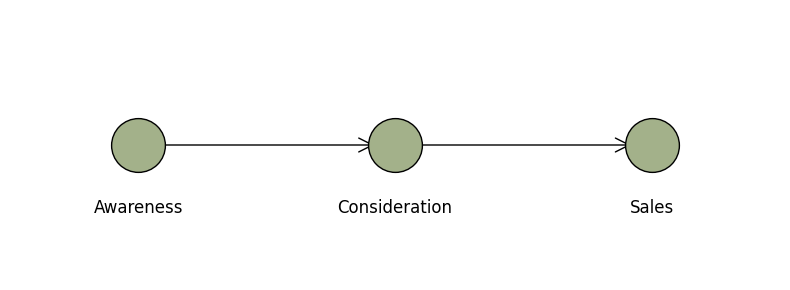

In [3]:
G = nx.DiGraph()
G.add_edges_from([
    ('Awareness', 'Consideration'),
    ('Consideration', 'Sales')
])

pos = {
    'Awareness': (0, 0),
    'Consideration': (2, 0),
    'Sales': (4, 0)
}

plot_custom_graph(G, pos)

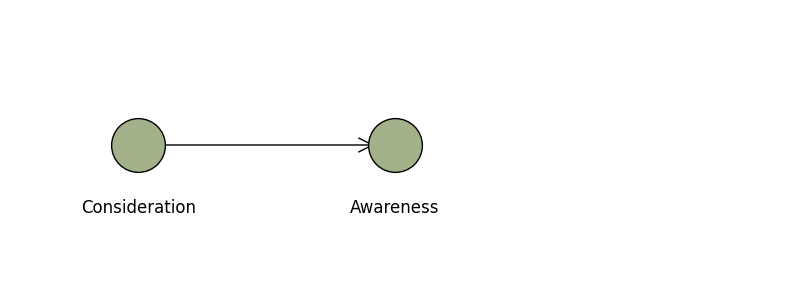

In [4]:
G = nx.DiGraph()
G.add_edges_from([
    ('Consideration', 'Awareness')
])

pos = {
    'Consideration': (0, 0),
    'Awareness': (2, 0),
}

plot_custom_graph(G, pos)

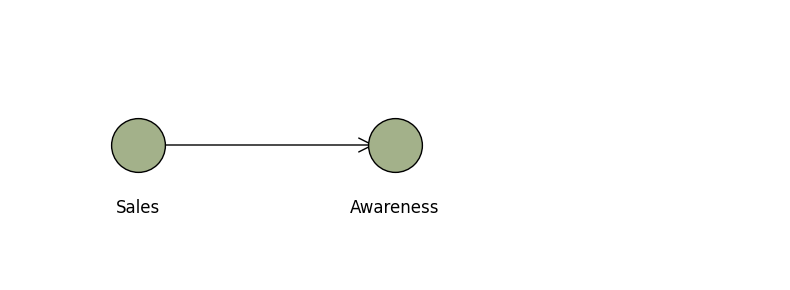

In [5]:
G = nx.DiGraph()
G.add_edges_from([
    ('Sales', 'Awareness')
])

pos = {
    'Sales': (0, 0),
    'Awareness': (2, 0),
}

plot_custom_graph(G, pos)

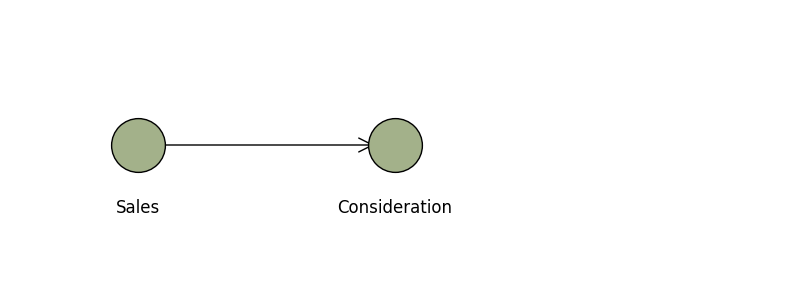

In [6]:
G = nx.DiGraph()
G.add_edges_from([
    ('Sales', 'Consideration')
])

pos = {
    'Sales': (0, 0),
    'Consideration': (2, 0),
}

plot_custom_graph(G, pos)

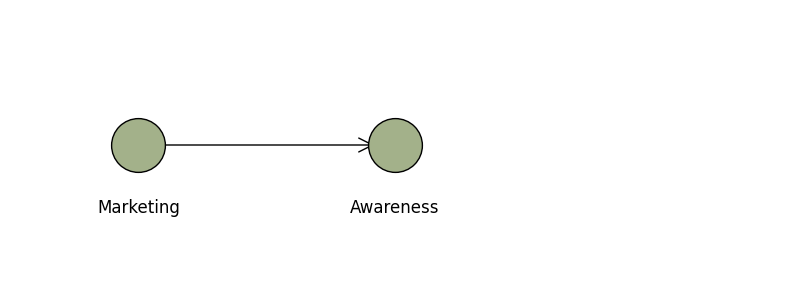

In [7]:
G = nx.DiGraph()
G.add_edges_from([
    ('Marketing', 'Awareness')
])

pos = {
    'Marketing': (0, 0),
    'Awareness': (2, 0),
}

plot_custom_graph(G, pos)

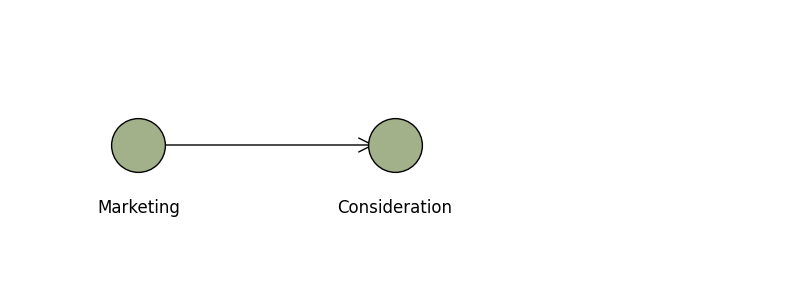

In [8]:
G = nx.DiGraph()
G.add_edges_from([
    ('Marketing', 'Consideration')
])

pos = {
    'Marketing': (0, 0),
    'Consideration': (2, 0),
}

plot_custom_graph(G, pos)

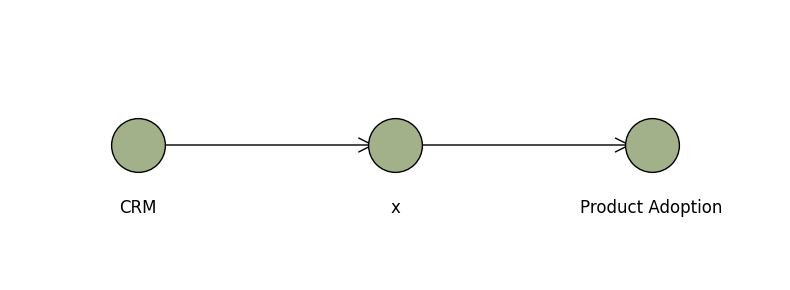

In [9]:
G = nx.DiGraph()
G.add_edges_from([
    ('CRM', 'x'),
    ('x', 'Product Adoption'),    
])

pos = {
    'CRM': (0, 0),
    'x': (2, 0),
    'Product Adoption': (4, 0),    
}

plot_custom_graph(G, pos)

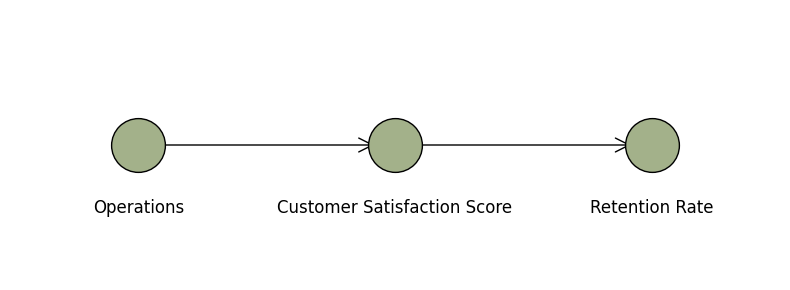

In [10]:
G = nx.DiGraph()
G.add_edges_from([
    ('Operations', 'Customer Satisfaction Score'),
    ('Customer Satisfaction Score', 'Retention Rate'),    
])

pos = {
    'Operations': (0, 0),
    'Customer Satisfaction Score': (2, 0),
    'Retention Rate': (4, 0),    
}

plot_custom_graph(G, pos)

# Case Study - VARMAX

/var/folders/pc/tq293phn2qn5dt7x93pgdh_h0000gn/T/ipykernel_930/1633014562.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, periods=n_periods, freq='M')


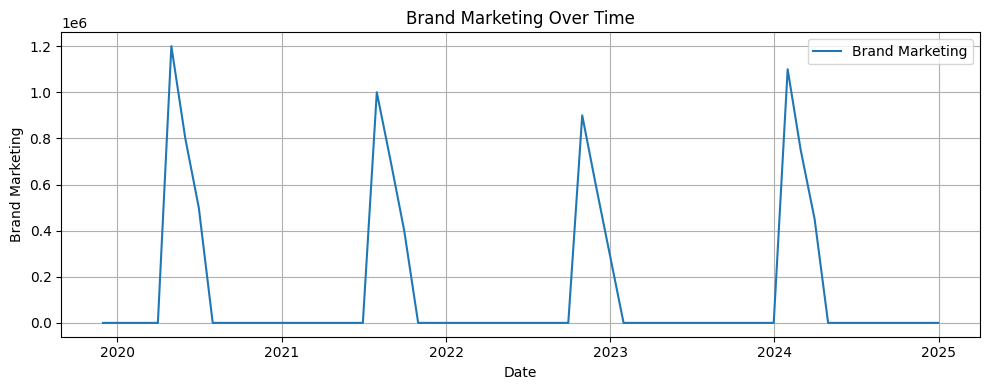

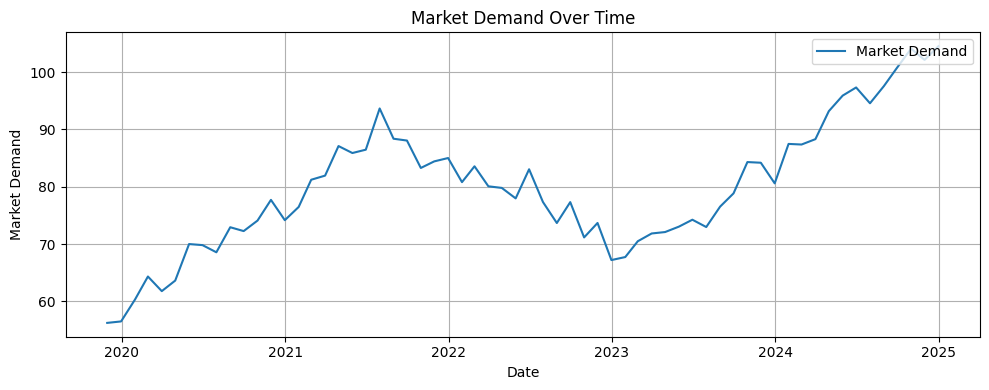

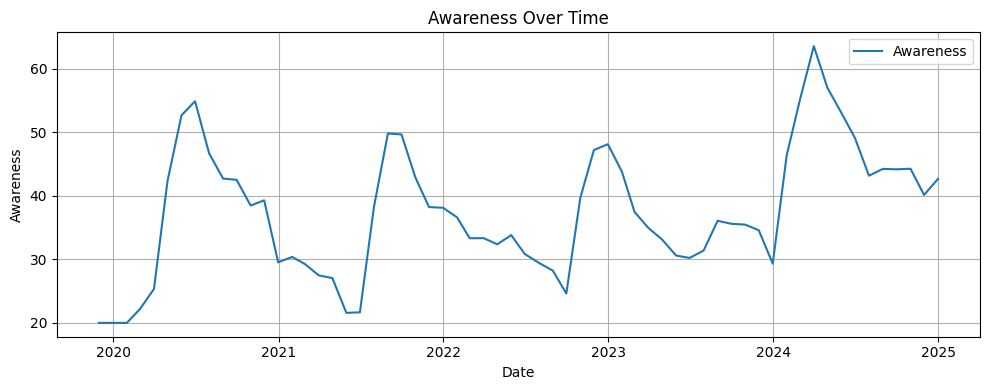

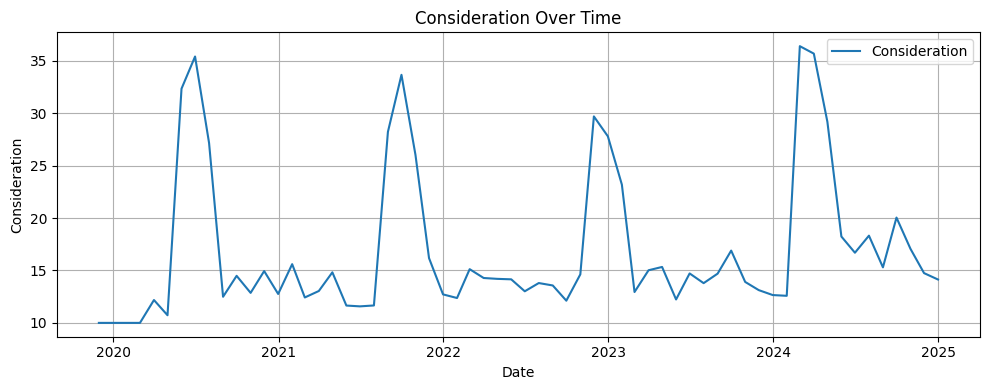

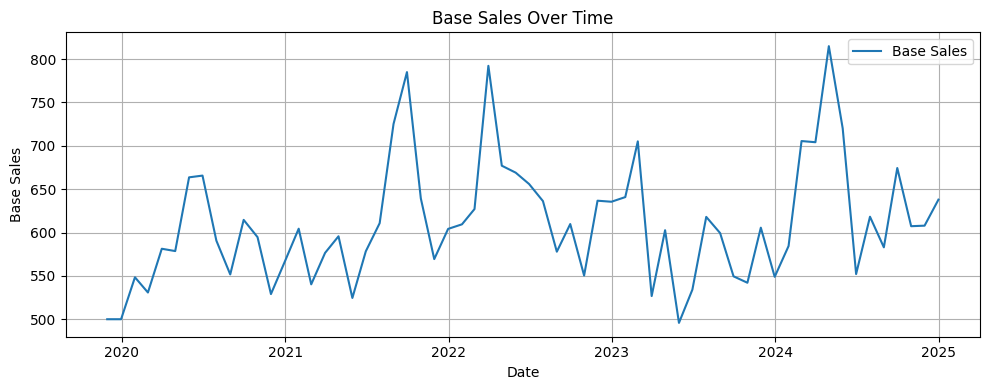

In [11]:
# Settings
start_date = '2019-11-30'
np.random.seed(42)
n_periods = 62

# Varying Brand Marketing Pulses (in £000s)
brand_marketing = np.zeros(n_periods)
pulse_profiles = [
    [120, 80, 50],  # Pulse 1
    [100, 70, 40],  # Pulse 2
    [90, 60, 30],   # Pulse 3
    [110, 75, 45]   # Pulse 4
]
pulse_starts = [5, 20, 35, 50]

for i, start in enumerate(pulse_starts):
    for j, value in enumerate(pulse_profiles[i]):
        if start + j < n_periods:
            brand_marketing[start + j] = value
brand_marketing_scaled = brand_marketing * 10000  # Convert to £

# Market Demand (unchanged)
trend = np.concatenate([
    np.linspace(0.5, 1.2, 20),
    np.linspace(1.2, 0.8, 20),
    np.linspace(0.8, 1.5, 22)  # Adjusted to match 62 periods
])
market_demand = trend + np.random.normal(0, 0.05, n_periods)
market_demand_scaled = market_demand * 50 + 30

# Awareness, Consideration, Base Sales
awareness = np.zeros(n_periods)
consideration = np.zeros(n_periods)
base_sales = np.zeros(n_periods)

for t in range(1, n_periods):
    awareness[t] = max(0, (
        0.8 * awareness[t - 1]
        + 0.03 * brand_marketing[t]
        + 0.01 * t
        + np.random.normal(0, 0.5)
    ))
awareness_scaled = awareness * 5 + 20

for t in range(2, n_periods):
    raw_consideration = (
        0.5 * market_demand[t]
        + 0.1 * awareness[t - 1]
        + 0.05 * brand_marketing[t - 1]
        + 0.1 * base_sales[t - 1]
        + np.random.normal(0, 0.3)
    )
    consideration[t] = max(0, min(raw_consideration, awareness[t - 1]))
consideration_scaled = consideration * 5 + 10

for t in range(2, n_periods):
    base_sales[t] = (
        0.3 * base_sales[t - 1]
        + 0.4 * market_demand[t]
        + 0.25 * consideration[t]
        + np.random.normal(0, 0.5)
    )
base_sales_scaled = base_sales * 100 + 500

# Time index for plotting
date_range = pd.date_range(start=start_date, periods=n_periods, freq='M')

# Plotting
series_names = [
    "Brand Marketing", "Market Demand",
    "Awareness", "Consideration", "Base Sales"
]
series_data = [
    brand_marketing_scaled, market_demand_scaled,
    awareness_scaled, consideration_scaled, base_sales_scaled
]

df = pd.DataFrame({
    'Month': date_range,
    'Brand_Marketing': brand_marketing_scaled,
    'Market_Demand': market_demand_scaled,
    'Awareness': awareness_scaled,
    'Consideration': consideration_scaled,
    'Base_Sales': base_sales_scaled
})

for name, data in zip(series_names, series_data):
    plt.figure(figsize=(10, 4))
    plt.plot(date_range, data, label=name)
    plt.title(f"{name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(name)
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
df

,Month,Brand_Marketing,Market_Demand,Awareness,Consideration,Base_Sales
0,2019-11-30,0.0,56.241785,20.000000,10.000000,500.000000
1,2019-12-31,0.0,56.496445,20.000000,10.000000,500.000000
2,2020-01-31,0.0,60.303432,20.000000,10.000000,548.366366
3,2020-02-29,0.0,64.333890,22.181315,10.000000,530.803883
4,2020-03-31,0.0,61.783038,25.335652,12.181315,581.274192
...,...,...,...,...,...,...
57,2024-08-31,0.0,97.560302,44.245216,15.298300,582.913003
58,2024-09-30,0.0,100.828159,44.176005,20.046183,674.389011
59,2024-10-31,0.0,104.105529,44.268384,17.061378,607.281980
60,2024-11-30,0.0,102.135398,40.141239,14.747872,607.895450


In [13]:
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # True if stationary

def make_stationary(series, name, max_diff=3):
    temp_series = series.copy()
    diff_count = 0

    while diff_count < max_diff:
        is_stationary = check_stationarity(temp_series, f"{name} (diff={diff_count})")
        if is_stationary:
            return temp_series.dropna(), diff_count
        temp_series = temp_series.diff()
        diff_count += 1

    print(f"Warning: {name} could not be made stationary after {max_diff} differences.\n")
    return temp_series.dropna(), diff_count

In [14]:
df['Awareness_stationary'], awareness_diff = make_stationary(df['Awareness'], 'Awareness')
df['Consideration_stationary'], consideration_diff = make_stationary(df['Consideration'], 'Consideration')
df['Base_stationary'], base_diff = make_stationary(df['Base_Sales'], 'Base_Sales')
df['Brand_stationary'], brand_diff = make_stationary(df['Brand_Marketing'], 'Brand_Marketing')
df['Market_stationary'], market_diff = make_stationary(df['Market_Demand'], 'Market_Demand')

stationary_df = df[[
    'Month',
    'Awareness_stationary',
    'Consideration_stationary',
    'Base_stationary',
    'Brand_stationary',
    'Market_stationary'
]].dropna()

print("\n✅ Differencing Summary:")
print(f"Awareness: {awareness_diff} diff(s)")
print(f"Consideration: {consideration_diff} diff(s)")
print(f"Base Sales: {base_diff} diff(s)")
print(f"Brand Spend: {brand_diff} diff(s)")
print(f"Market Demand: {market_diff} diff(s)")


✅ Differencing Summary:
Awareness: 0 diff(s)
Consideration: 0 diff(s)
Base Sales: 0 diff(s)
Brand Spend: 0 diff(s)
Market Demand: 2 diff(s)


In [15]:
stationary_df.head()

,Month,Awareness_stationary,Consideration_stationary,Base_stationary,Brand_stationary,Market_stationary
2,2020-01-31,20.000000,10.000000,548.366366,0.0,3.552328
3,2020-02-29,22.181315,10.000000,530.803883,0.0,0.223471
4,2020-03-31,25.335652,12.181315,581.274192,0.0,-6.581311
5,2020-04-30,42.338496,10.729020,578.589386,1200000.0,4.392999
6,2020-05-31,52.679629,32.338496,663.628381,800000.0,4.533333


In [16]:
endog = stationary_df[["Awareness_stationary", "Consideration_stationary", "Base_stationary"]]
exog = stationary_df[["Brand_stationary", "Market_stationary"]]

scaler_endog = StandardScaler()
scaled_endog = pd.DataFrame(
    scaler_endog.fit_transform(endog),
    columns=endog.columns,
    index=endog.index
)

scaler_exog = StandardScaler()
scaled_exog = pd.DataFrame(
    scaler_exog.fit_transform(exog),
    columns=exog.columns,
    index=exog.index
)

model = VARMAX(scaled_endog, exog=scaled_exog, order=(1, 0), trend='c')
fitted = model.fit(maxiter=1000, disp=False)
print(fitted.summary())

/Users/ryanosullivan/Documents/repos/brand_long_term_effects/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                                      Statespace Model Results                                                     
Dep. Variable:     ['Awareness_stationary', 'Consideration_stationary', 'Base_stationary']   No. Observations:                   60
Model:                                                                             VARX(1)   Log Likelihood                -124.031
                                                                               + intercept   AIC                            296.063
Date:                                                                     Mon, 07 Jul 2025   BIC                            346.327
Time:                                                                             20:39:11   HQIC                           315.724
Sample:                                                                                  0                                         
                                                                            

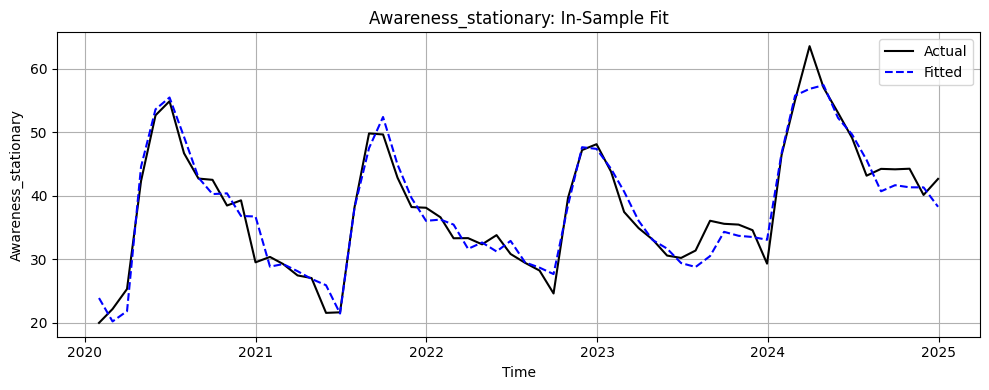

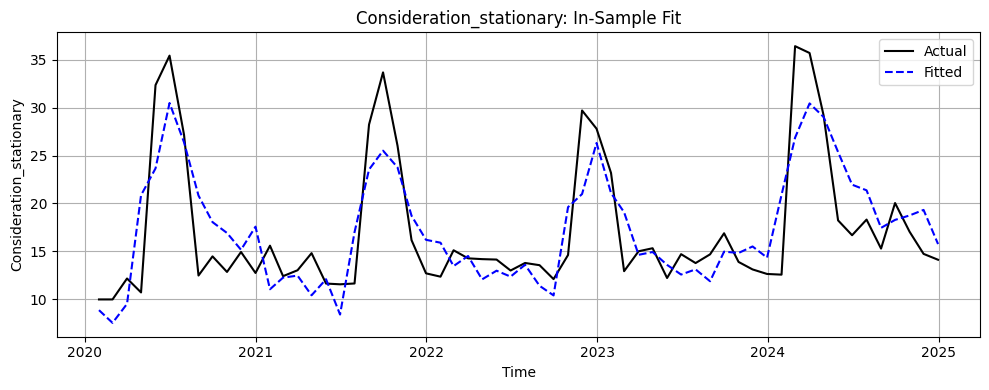

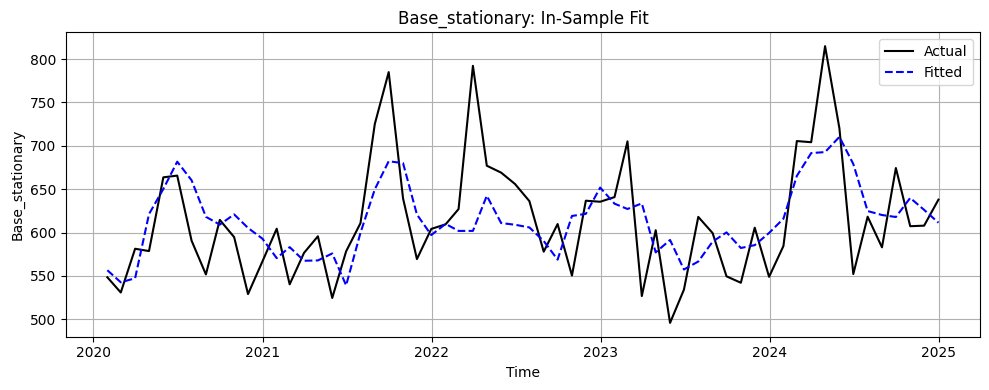

In [17]:
fitted_values_scaled = fitted.fittedvalues

fitted_values = pd.DataFrame(
    scaler_endog.inverse_transform(fitted_values_scaled),
    columns=endog.columns,
    index=endog.index
)

for col in endog.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(stationary_df["Month"], endog[col], label="Actual", color="black")
    plt.plot(stationary_df["Month"], fitted_values[col], label="Fitted", color="blue", linestyle="--")
    plt.title(f"{col}: In-Sample Fit")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/Users/ryanosullivan/Documents/repos/brand_long_term_effects/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ryanosullivan/Documents/repos/brand_long_term_effects/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ryanosullivan/Documents/repos/brand_long_term_effects/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


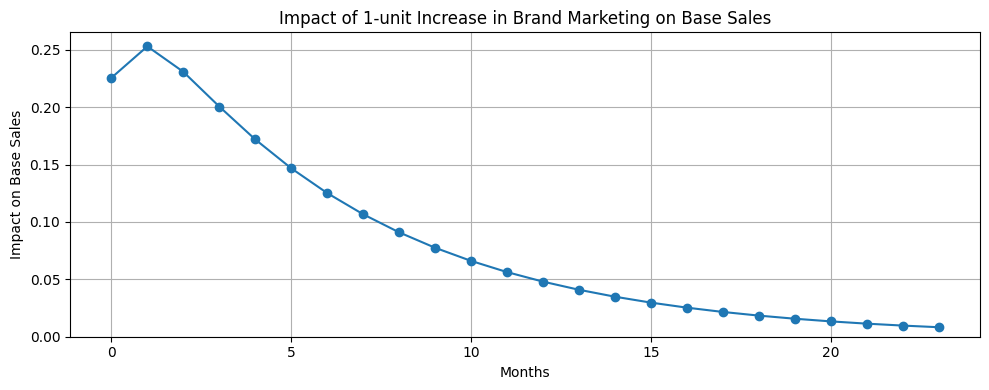

In [18]:
n_forecast = 24

future_index = range(n_forecast)

exog_base = pd.DataFrame({
    "Brand_stationary": [0] * n_forecast,
    "Market_stationary": [0] * n_forecast
}, index=future_index)

exog_shock = exog_base.copy()
exog_shock.loc[0, "Brand_stationary"] = 1

forecast_base = fitted.forecast(steps=n_forecast, exog=exog_base)
forecast_shock = fitted.forecast(steps=n_forecast, exog=exog_shock)

impact = forecast_shock["Base_stationary"] - forecast_base["Base_stationary"]

plt.figure(figsize=(10, 4))
plt.plot(future_index, impact, marker='o')
plt.title("Impact of 1-unit Increase in Brand Marketing on Base Sales")
plt.xlabel("Months")
plt.ylabel("Impact on Base Sales")
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.show()

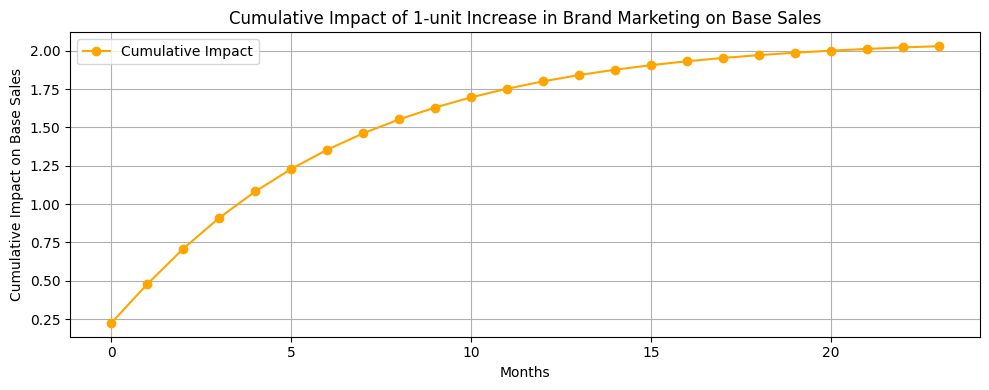

In [19]:
cumulative_impact = impact.cumsum()
plt.figure(figsize=(10, 4))
plt.plot(future_index, cumulative_impact, marker='o', color='orange', label='Cumulative Impact')
plt.title("Cumulative Impact of 1-unit Increase in Brand Marketing on Base Sales")
plt.xlabel("Months")
plt.ylabel("Cumulative Impact on Base Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Case study - VECM

/var/folders/pc/tq293phn2qn5dt7x93pgdh_h0000gn/T/ipykernel_930/76766342.py:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, periods=n_periods, freq='M')


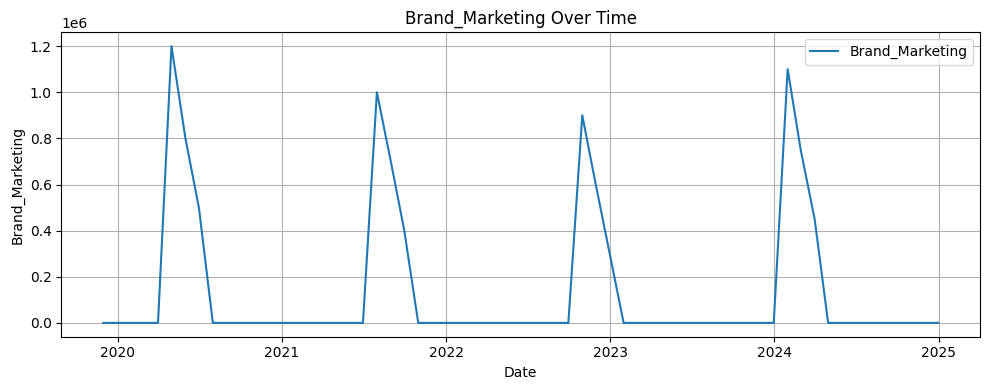

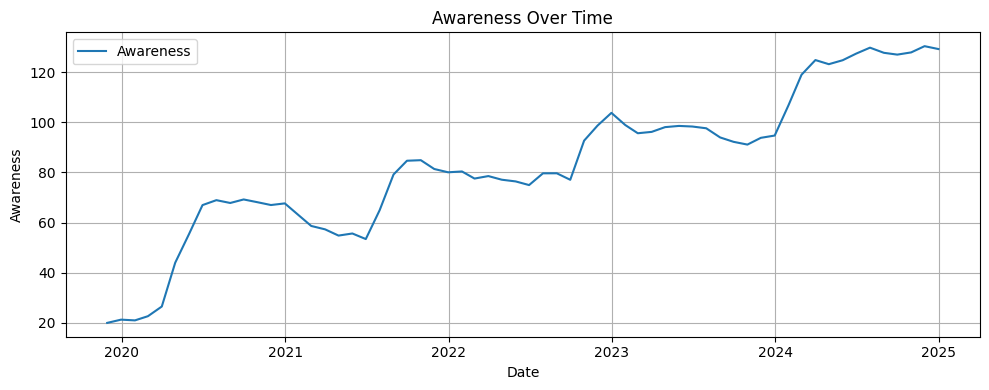

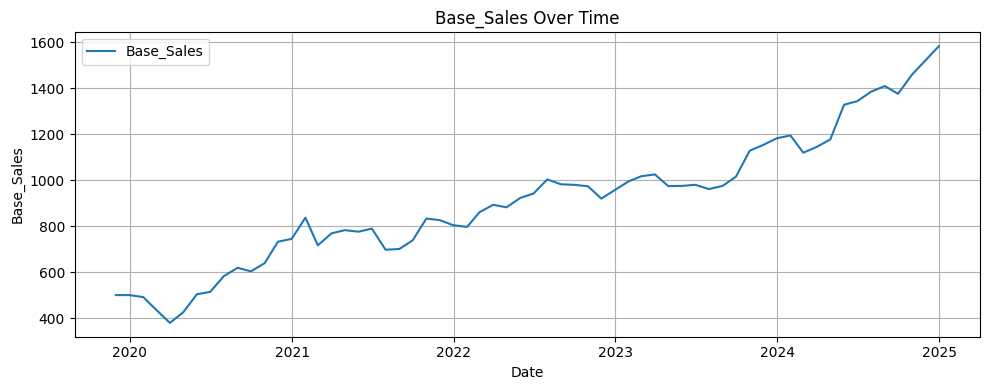

In [41]:
# Settings
start_date = '2019-11-30'
np.random.seed(42)
n_periods = 62

# Brand Marketing Pulses (£000s)
brand_marketing = np.zeros(n_periods)
pulse_profiles = [
    [120, 80, 50],  # Pulse 1
    [100, 70, 40],  # Pulse 2
    [90, 60, 30],   # Pulse 3
    [110, 75, 45]   # Pulse 4
]
pulse_starts = [5, 20, 35, 50]

for i, start in enumerate(pulse_starts):
    for j, value in enumerate(pulse_profiles[i]):
        if start + j < n_periods:
            brand_marketing[start + j] = value
brand_marketing_scaled = brand_marketing * 10000  # Convert to £

# Awareness (non-stationary: random walk with drift)
awareness = np.zeros(n_periods)
for t in range(1, n_periods):
    awareness[t] = (
        awareness[t - 1]
        + 0.03 * brand_marketing[t]  # Immediate marketing effect
        + 0.01  # Drift
        + np.random.normal(0, 0.5)
    )
awareness_scaled = awareness * 5 + 20  # Scaled for realism

# Base Sales (cointegrated with awareness via error correction)
base_sales = np.zeros(n_periods)
for t in range(2, n_periods):
    base_sales[t] = (
        base_sales[t - 1]
        + 0.02 * (awareness[t - 1] - base_sales[t - 1])  # Cointegration: Error correction term
        + np.random.normal(0, 0.5)
    )
base_sales_scaled = base_sales * 100 + 500  # Scale to real-world units

# Time index
date_range = pd.date_range(start=start_date, periods=n_periods, freq='M')

df = pd.DataFrame({
    'Month': date_range,
    'Brand_Marketing': brand_marketing_scaled,
    'Awareness': awareness_scaled,
    'Base_Sales': base_sales_scaled
})

for name in ['Brand_Marketing', 'Awareness', 'Base_Sales']:
    plt.figure(figsize=(10, 4))
    plt.plot(df['Month'], df[name], label=name)
    plt.title(f"{name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [42]:
endog = df[["Awareness", "Base_Sales"]]
exog = df[["Brand_Marketing"]]

scaler_endog = StandardScaler()
scaled_endog = pd.DataFrame(
    scaler_endog.fit_transform(endog),
    columns=endog.columns,
    index=endog.index
)

scaler_exog = StandardScaler()
scaled_exog = pd.DataFrame(
    scaler_exog.fit_transform(exog),
    columns=exog.columns,
    index=exog.index
)

In [43]:
# Run Johansen Cointegration Test
jres = coint_johansen(scaled_endog, det_order=1, k_ar_diff=2)
print("Johansen Trace Stats:", jres.lr1)
print("Critical Values (95%):", jres.cvt[:, 1])

# Determine cointegration rank
rank = np.sum(jres.lr1 > jres.cvt[:, 1])
print(f"\nEstimated Cointegration Rank: {rank}")

Johansen Trace Stats: [22.57067464  3.43385003]
Critical Values (95%): [18.3985  3.8415]

Estimated Cointegration Rank: 1


In [44]:
# Lag Order Selection
lag_order = select_order(scaled_endog, maxlags=5, deterministic="ci", exog=exog)
print("\nLag Order Selection:\n", lag_order.summary())
optimal_lag = lag_order.aic
print(f"\nOptimal Lag (AIC): {optimal_lag}")


Lag Order Selection:
  VECM Order Selection (* highlights the minimums)
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -8.512*     -8.150*  0.0002012*     -8.372*
1      -8.415      -7.908   0.0002221      -8.219
2      -8.328      -7.677   0.0002429      -8.076
3      -8.261      -7.465   0.0002611      -7.953
4      -8.158      -7.217   0.0002916      -7.793
5      -8.235      -7.150   0.0002724      -7.814
-------------------------------------------------

Optimal Lag (AIC): 0


In [45]:
# Estimate VECM
vecm_model = VECM(
    endog=scaled_endog,
    exog=scaled_exog,
    k_ar_diff=optimal_lag,
    coint_rank=rank,
    deterministic="ci"  # Constant in cointegrating equation
)
vecm_res = vecm_model.fit()
print("\nVECM Summary:\n", vecm_res.summary())


VECM Summary:
 Det. terms outside the coint. relation & lagged endog. parameters for equation Awareness
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog1          0.1605      0.010     16.010      0.000       0.141       0.180
Det. terms outside the coint. relation & lagged endog. parameters for equation Base_Sales
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog1         -0.0292      0.021     -1.390      0.165      -0.070       0.012
             Loading coefficients (alpha) for equation Awareness              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ec1            0.0191      0.003      5.918      0.000       0.013       0.025
             Lo

In [46]:
# Extract Cointegration Coefficients
beta = vecm_res.beta.flatten()
beta_awareness = beta[0]
beta_base_sales = beta[1]
const_val = vecm_res.det_coef_coint.flatten()[0]

# Normalize to express Base_Sales as a function of Awareness
beta_awareness_norm = -beta_awareness / beta_base_sales
const_norm = -const_val / beta_base_sales

print("\n--- Long-run Cointegration Equation ---")
print(f"Base_Sales = {beta_awareness_norm:.3f} * Awareness + {const_norm:.3f}")

# Extract Exogenous Coefficient on Awareness
exog_coefs = vecm_res.exog_coefs
marketing_coef_on_awareness = exog_coefs[0, 0]
print(f"\nShort-run Effect of Marketing on Awareness: {marketing_coef_on_awareness:.6f}")

# Compute Implied Long-run Effect of Marketing on Base Sales
long_run_effect = marketing_coef_on_awareness * beta_awareness_norm
print(f"\nImplied Long-run Effect of Marketing on Base Sales (via Awareness): {long_run_effect:.4f}")


--- Long-run Cointegration Equation ---
Base_Sales = 1.047 * Awareness + 3.229

Short-run Effect of Marketing on Awareness: 0.160532

Implied Long-run Effect of Marketing on Base Sales (via Awareness): 0.1682
